## Import

Obiettivo è confrontare la durata dei film con il rating, se sono correlati

Idea: come per la musica, chi vede i film se sono troppo lunghi o troppo corti ne è influenzato?

Idea: come per la musica, chi vede i film se sono troppo lunghi o troppo corti ne è influenzato

Ultimo aggiornamento dataset: 19-11-2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataframeTitoli = pd.read_csv("./data/title_basics.tsv", sep="\t", low_memory=False)
dataframeRating = pd.read_csv("./data/title_ratings.tsv", sep="\t", low_memory=False)

In [3]:
mergedDataframe = pd.merge(dataframeTitoli, dataframeRating, on="tconst")

In [4]:
mergedDataframe.shape

(993821, 11)

In [5]:
mergedDataframe.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  \
0        0      1894      \N              1         Documentary,Short   
1        0      1892      \N              5           Animation,Short   
2        0      1892      \N              4  Animation,Comedy,Romance   
3        0      1892      \N             \N           Animation,Short   
4        0      1893      \N              1              Comedy,Short   

   averageRating  numVotes  
0            5.6      1550  
1            6.1       186  
2            6.5      1207  
3            6.2       113  
4            6.1      1934

In [6]:
mergedDataframe.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  \
0        0      1894      \N              1         Documentary,Short   
1        0      1892      \N              5           Animation,Short   
2        0      1892      \N              4  Animation,Comedy,Romance   
3        0      1892      \N             \N           Animation,Short   
4        0      1893      \N              1              Comedy,Short   

   averageRating  numVotes  
0            5.6      1550  
1            6.1       186  
2            6.5      1207  
3            6.2       113  
4            6.1      1934

## Data Cleaning

In [7]:
mergedDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993821 entries, 0 to 993820
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          993821 non-null  object 
 1   titleType       993821 non-null  object 
 2   primaryTitle    993821 non-null  object 
 3   originalTitle   993821 non-null  object 
 4   isAdult         993821 non-null  int64  
 5   startYear       993821 non-null  object 
 6   endYear         993821 non-null  object 
 7   runtimeMinutes  993821 non-null  object 
 8   genres          993819 non-null  object 
 9   averageRating   993821 non-null  float64
 10  numVotes        993821 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 91.0+ MB


Check for null values

In [8]:
mergedDataframe.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            2
averageRating     0
numVotes          0
dtype: int64

Dropping unnecessary columns

In [9]:
mergedDataframe = mergedDataframe.drop(['isAdult', 'endYear'], axis=1)

In [10]:
mergedDataframe.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes'],
      dtype='object')

Fix data types

In [11]:
mergedDataframe.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
startYear          object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [12]:
mergedDataframe['titleType'] = pd.Categorical(mergedDataframe['titleType'])

In [13]:
mergedDataframe['titleType'].cat.categories

Index(['movie', 'short', 'tvEpisode', 'tvMiniSeries', 'tvMovie', 'tvSeries',
       'tvShort', 'tvSpecial', 'video', 'videoGame'],
      dtype='object')

Problema dato da caratteri \N presenti nel dataset

In [14]:
mergedDataframe.runtimeMinutes = pd.to_numeric(mergedDataframe.runtimeMinutes, errors ='coerce').fillna(0).astype('int')

In [15]:
mergedDataframe.sort_values(by='runtimeMinutes', ascending=False).head()

tconst titleType          primaryTitle         originalTitle  \
454455  tt10844584     movie                   100                   100   
954725   tt8273150     movie             Logistics             Logistics   
683780   tt2659636     movie  Modern Times Forever  Modern Times Forever   
454461  tt10844900     movie                    Qw                    Qw   
659678   tt2355497     movie          Beijing 2003          Beijing 2003   

       startYear  runtimeMinutes       genres  averageRating  numVotes  
454455      2019           59460        Drama            9.2        22  
954725      2012           51420  Documentary            5.4        29  
683780      2011           14400  Documentary            6.2        72  
454461      2019           10062        Drama            9.1        19  
659678      2004            9000  Documentary            6.8        11

In [16]:
mergedDataframe.dtypes

tconst              object
titleType         category
primaryTitle        object
originalTitle       object
startYear           object
runtimeMinutes       int32
genres              object
averageRating      float64
numVotes             int64
dtype: object

In [17]:
mergedDataframe.startYear = pd.to_numeric(mergedDataframe.startYear, errors ='coerce').fillna(0).astype('int')

### Modellazione

Risolvo criticità null values

In [18]:
mergedDataframe[mergedDataframe['runtimeMinutes'] == 0].shape

(272707, 9)

Divisione tra movie e altri

In [19]:
FilmDataframe = mergedDataframe[mergedDataframe['titleType'] == "movie"]

In [20]:
FilmDataframe.shape

(241193, 9)

In [21]:
film2 = FilmDataframe[(FilmDataframe['startYear'] == 2018) | (FilmDataframe['startYear'] == 2019)]

In [22]:
film2 = film2[film2['runtimeMinutes'] != 0]

In [23]:
film2 = film2[film2['numVotes'] > 15000]

In [24]:
film2.shape

(319, 9)

In [25]:
film2.head()

tconst titleType         primaryTitle        originalTitle  \
196607  tt0360556     movie       Fahrenheit 451       Fahrenheit 451   
229195  tt0437086     movie  Alita: Battle Angel  Alita: Battle Angel   
233444  tt0448115     movie              Shazam!              Shazam!   
373056  tt0800325     movie             The Dirt             The Dirt   
385555  tt0837563     movie         Pet Sematary         Pet Sematary   

        startYear  runtimeMinutes                   genres  averageRating  \
196607       2018             100    Drama,Sci-Fi,Thriller            4.9   
229195       2019             122  Action,Adventure,Sci-Fi            7.4   
233444       2019             132  Action,Adventure,Comedy            7.1   
373056       2019             107   Biography,Comedy,Drama            7.0   
385555       2019             101  Horror,Mystery,Thriller            5.8   

        numVotes  
196607     15328  
229195    171875  
233444    191474  
373056     31721  
385555     61661

In [26]:
film2.sort_values(by='runtimeMinutes', ascending=False).head()

tconst titleType       primaryTitle      originalTitle  startYear  \
987664  tt9573980     movie  Leaving Neverland  Leaving Neverland       2019   
769831  tt4154796     movie  Avengers: Endgame  Avengers: Endgame       2019   
973691  tt8983202     movie        Kabir Singh        Kabir Singh       2019   
925385  tt7392212     movie       Rangasthalam       Rangasthalam       2018   
923900  tt7349950     movie     It Chapter Two     It Chapter Two       2019   

        runtimeMinutes                  genres  averageRating  numVotes  
987664             240             Documentary            7.0     22465  
769831             181  Action,Adventure,Drama            8.5    603975  
973691             173           Drama,Romance            7.2     20773  
925385             170            Action,Drama            8.4     16327  
923900             169    Drama,Fantasy,Horror            6.8    113443

In [27]:
film2.sort_values(by='runtimeMinutes').head()

tconst titleType                  primaryTitle  \
984586  tt9398640     movie  Between Two Ferns: The Movie   
927194  tt7451284     movie                  Batman Ninja   
497124  tt1285009     movie  The Strangers: Prey at Night   
899024  tt6742252     movie                    The Guilty   
844323  tt5613484     movie                        Mid90s   

                       originalTitle  startYear  runtimeMinutes  \
984586  Between Two Ferns: The Movie       2019              82   
927194                  Batman Ninja       2018              85   
497124  The Strangers: Prey at Night       2018              85   
899024                  Den skyldige       2018              85   
844323                        Mid90s       2018              85   

                         genres  averageRating  numVotes  
984586                   Comedy            6.1     18811  
927194  Action,Animation,Sci-Fi            5.6     15071  
497124                   Horror            5.2     23590  
899024     Crime,Drama,Thriller            7.5     32082  
844323             Comedy,Drama            7.4     32054

In [28]:
mergedDataframe[mergedDataframe['titleType'] == "tvSeries"].shape

(65991, 9)

In [29]:
mergedDataframe[mergedDataframe['titleType'] == "tvSeries"].sort_values(by='startYear', ascending=False).head()

tconst titleType         primaryTitle        originalTitle  \
993812   tt9916380  tvSeries  Meie aasta Aafrikas  Meie aasta Aafrikas   
948094   tt8050740  tvSeries             Amphibia             Amphibia   
947750   tt8040300  tvSeries            A Divisão            A Divisão   
947704   tt8038148  tvSeries            El pueblo            El pueblo   
452306  tt10763926  tvSeries    39 i pól tygodnia    39 i pól tygodnia   

        startYear  runtimeMinutes                      genres  averageRating  \
993812       2019              43     Adventure,Comedy,Family            9.3   
948094       2019              23  Adventure,Animation,Comedy            7.8   
947750       2019              40          Action,Crime,Drama            7.9   
947704       2019               0                      Comedy            7.2   
452306       2019              44                      Comedy            6.2   

        numVotes  
993812        99  
948094       582  
947750        19  
947704       139  
452306        20

In [30]:
mergedDataframe[(mergedDataframe['titleType'] == "tvSeries") & (mergedDataframe['startYear'] == 1994)].sort_values(by='averageRating', ascending=False).head(20)

tconst titleType                             primaryTitle  \
176998   tt0310342  tvSeries                                 Weird TV   
626655   tt2090741  tvSeries                                 Chubbies   
185824   tt0331400  tvSeries                    The Steven Banks Show   
78777    tt0108969  tvSeries                                    Traps   
123269   tt0191714  tvSeries                           Otvorena vrata   
410611   tt0932859  tvSeries                        Royal Palm Estate   
212256   tt0395862  tvSeries                                 Front Up   
703937   tt3016336  tvSeries                         Storie maledette   
108154   tt0161125  tvSeries              El ángel vengador: Calígula   
105475   tt0155449  tvSeries                                 Sloggers   
78556    tt0108714  tvSeries                           Breakfast Time   
437304  tt10313338  tvSeries  12 Mart: ihtilalin Pencesinde Demokrasi   
96980    tt0138252  tvSeries       Personal FX: The Collectibles Show   
78726    tt0108910  tvSeries                               Roughnecks   
78612    tt0108778  tvSeries                                  Friends   
972295   tt8927406  tvSeries                    UEFA Champions League   
189917   tt0343264  tvSeries                           Floyd on Italy   
137198   tt0222685  tvSeries                         Las aguas mansas   
380774   tt0823638  tvSeries                                 A*mazing   
379763   tt0819986  tvSeries                         Crazy Crosswords   

                                  originalTitle  startYear  runtimeMinutes  \
176998                                 Weird TV       1994              60   
626655                                  Bumbari       1994              30   
185824                    The Steven Banks Show       1994               0   
78777                                     Traps       1994              60   
123269                           Otvorena vrata       1994              30   
410611                        Royal Palm Estate       1994              60   
212256                                 Front Up       1994              26   
703937                         Storie maledette       1994               0   
108154              El ángel vengador: Calígula       1994               0   
105475                                 Sloggers       1994               0   
78556                            Breakfast Time       1994             120   
437304  12 Mart: ihtilalin Pencesinde Demokrasi       1994             500   
96980        Personal FX: The Collectibles Show       1994               0   
78726                                Roughnecks       1994              50   
78612                                   Friends       1994              22   
972295                    UEFA Champions League       1994              90   
189917                           Floyd on Italy       1994              30   
137198                         Las aguas mansas       1994              60   
380774                                 A*mazing       1994              26   
379763                         Crazy Crosswords       1994               0   

                    genres  averageRating  numVotes  
176998                  \N            9.3        19  
626655             Musical            9.3        11  
185824                  \N            9.1        22  
78777                Drama            9.1        12  
123269              Comedy            9.0      3115  
410611               Drama            9.0        11  
212256         Documentary            9.0        14  
703937                  \N            9.0         7  
108154               Drama            9.0        31  
105475  Drama,Family,Sport            9.0         7  
78556            Talk-Show            8.9        55  
437304         Documentary            8.9        32  
96980           Reality-TV            8.9        36  
78726                Drama            8.9        42  
78612       Comedy,Romance   

In [31]:
mergedDataframe[mergedDataframe['titleType'] == "tvMovie"].shape

(42760, 9)

In [32]:
mergedDataframe[mergedDataframe['titleType'] == "tvMovie"].sort_values(by='startYear', ascending=False).head(10)

tconst titleType  \
993806   tt9916192   tvMovie   
430713  tt10128172   tvMovie   
430832  tt10132922   tvMovie   
430841  tt10133224   tvMovie   
939515   tt7791184   tvMovie   
939015   tt7773374   tvMovie   
938893   tt7769502   tvMovie   
938159   tt7751428   tvMovie   
937697   tt7735488   tvMovie   
937505   tt7728082   tvMovie   

                                             primaryTitle  \
993806         Danielle Darrieux: Il est poli d'être gai!   
430713  How to See a Black Hole: The Universe's Greate...   
430832                                 Black Hole Hunters   
430841                     Trapped: The Alex Cooper Story   
939515                                    Troubled Waters   
939015                             Scheidung für Anfänger   
938893                                   Die Auferstehung   
938159                                Liberi di scegliere   
937697                              Il mondo sulle spalle   
937505                                   Chasing the Moon   

                                            originalTitle  startYear  \
993806         Danielle Darrieux: Il est poli d'être gai!       2019   
430713  How to See a Black Hole: The Universe's Greate...       2019   
430832                                 Black Hole Hunters       2019   
430841                     Trapped: The Alex Cooper Story       2019   
939515                               La promesse de l'eau       2019   
939015                             Scheidung für Anfänger       2019   
938893                                   Die Auferstehung       2019   
938159                                Liberi di scegliere       2019   
937697                              Il mondo sulle spalle       2019   
937505                                   Chasing the Moon       2019   

        runtimeMinutes               genres  averageRating  numVotes  
993806              53            Biography            7.4         9  
430713               0          Documentary            8.3        22  
430832              60          Documentary            8.0         6  
430841              87      Biography,Drama            6.4        97  
939515              91          Crime,Drama            5.6        17  
939015              90               Comedy            6.1        27  
938893              90         Comedy,Drama            6.0        30  
938159             126                Drama            7.5        20  
937697             100                Drama            7.2         5  
937505             360  Documentary,History            8.6       442

## DataViz

## Waffle - rapporto tra film e serie tv nel dataset

In [33]:
from pywaffle import Waffle

In [34]:
mergedDataframe[mergedDataframe['titleType'] == "movie"].shape

(241193, 9)

In [35]:
mergedDataframe[mergedDataframe['titleType'] == "tvSeries"].shape

(65991, 9)

In [36]:
num_movie = 241193
num_tvSeries = 65991
tot_df = num_movie + num_tvSeries

In [37]:
perc_films = num_movie / tot_df * 100
print(perc_films)

78.51743580394812


In [38]:
perc_tvs = num_tvSeries / tot_df * 100
print(perc_tvs)

21.48256419605188


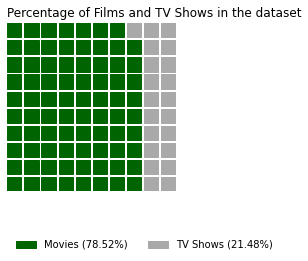

In [39]:
data = {'Movies': 78.52, 'TV Shows': 21.48}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentage of Films and TV Shows in the dataset', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

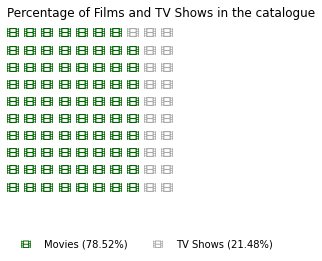

In [40]:
data = {'Movies': 78.52, 'TV Shows': 21.48}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentage of Films and TV Shows in the catalogue', 'loc': 'left'},
    icons='film',
    font_size=12,
    icon_legend=True,
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

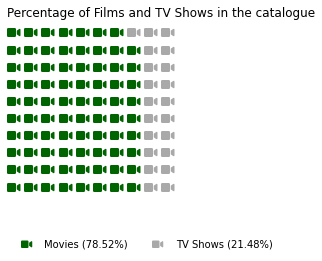

In [41]:
data = {'Movies': 78.52, 'TV Shows': 21.48}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentage of Films and TV Shows in the catalogue', 'loc': 'left'},
    icons='video',
    font_size=12,
    icon_legend=True,
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

source code: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart

## 1 - correlation btw years and duration of films

correlazione tra anni e durata dei film

domanda di ricerca: come per la musica, è vero che si è ridotta attenzione utenti e dunque si producono film meno lunghi rispetto a prima?

(forse dataset più adatto un archivio di film rispetto a netflix che ha molti film recenti;

inoltre all'inizio non si potevano fare film troppo lunghi per costi e tecnologie, quindi magari indagare trend più recente o spazio temporale ristretto)

In [42]:
film_years = mergedDataframe[(mergedDataframe['titleType'] == "movie") & (mergedDataframe['runtimeMinutes'] != 0)][['titleType', 'startYear', 'runtimeMinutes']]

In [43]:
film_years_grouped = film_years.groupby('startYear')['startYear'].count()

In [44]:
film_years_grouped.tail(20)

startYear
2000    2681
2001    2869
2002    3053
2003    3224
2004    3629
2005    3996
2006    4476
2007    4644
2008    5246
2009    5930
2010    6168
2011    6697
2012    6986
2013    7358
2014    7719
2015    7847
2016    8037
2017    8046
2018    7368
2019    4719
Name: startYear, dtype: int64

In [45]:
import plotly.graph_objects as px
import plotly.express as go

x = film_years['startYear']
y = film_years['runtimeMinutes']

plot = px.Figure(data=[px.Scatter(
    x=x,
    y=y,
    mode='markers',)
])

plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                step="year",
                stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)

plot.show()

In [46]:
film_years[film_years['runtimeMinutes'] < 15].count()

titleType         129
startYear         129
runtimeMinutes    129
dtype: int64

In [47]:
film_years[film_years['runtimeMinutes'] < 15][['primaryTitle', 'startYear', 'runtimeMinutes']]

KeyError: "['primaryTitle'] not in index"

controllato alcuni a caso su internet ed effettivamente hanno questa durata

#### Line chart anni e durata film ultimi 15 anni

In [ ]:
netflix_last15 = netflix_f[netflix_f['release_year'] > 2006][['title', 'release_year', 'duration_min']]

In [ ]:
grouped_15 = netflix_last15.groupby('release_year')

In [ ]:
mean_15 = grouped_15.mean()

In [ ]:
mean_15 = mean_15.reset_index()

In [ ]:
mean_15.head()

In [ ]:
mean_15.duration_min = mean_15.duration_min.round(2)
mean_15.head()

In [ ]:
sns.lineplot(data=mean_15, x='release_year', y='duration_min')

In [ ]:
sns.pointplot(data=mean_15, x='release_year', y='duration_min')

!!! non va bene solo la media

## 2 - bar chart difference btw number of movies or tv shows during the years

differenza tra numero di film e numero di serie tv legato all'anno di uscita

In [ ]:
#creazione nuovo dataframe
dataframe = pd.DataFrame({"release_year":[], "movies": [], "tv_series":[]})
#ciclo for per ogni classe d'età
for item in netflix["release_year"].unique():
  #query per identificare i record con punteggio peggiorato per la classe d'età in esame
  queryStringMovies = "release_year == "+str(item)+" and type == 'Movie'"
  #query per identificare i record con punteggio migliorato per la classe d'età in esame
  queryStringTV = "release_year == "+str(item)+" and type == 'TV Show'"

  #query
  resMovies = netflix.query(queryStringMovies)
  resTV = netflix.query(queryStringTV)
  #inserimento nel dataframe del numero di migliorati o peggiorati per la classe d'età in esame
  dataframe.loc[len(dataframe.index)] = [str(item), len(resMovies), len(resTV)]
#ordinamento delle classi d'età
dataframe = dataframe.sort_values("release_year")

dataframe.head()


In [ ]:
dataframe['movies'] = dataframe['movies'].astype('float')
dataframe['tv_series'] = dataframe['tv_series'].astype('float')

dataframe = pd.eval("delta = dataframe.movies - dataframe.tv_series", target=dataframe)

In [ ]:
dataframe.head(1)

In [ ]:
import plotly.express as px
fig = px.line(dataframe, x="release_year", y=["movies", "tv_series"])
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(dataframe, x="release_year", y=["movies", "tv_series"])
fig.update_xaxes(type="log")
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(dataframe, x="release_year", y=["movies", "tv_series"])
fig.update_xaxes(type="date")
fig.show()

In [ ]:
dataframe.dtypes

In [ ]:
dataframe['release_year'] = dataframe['release_year'].astype('int')

In [ ]:
dataframe.dtypes

In [ ]:
# aggiungo decade al df

dataframe.loc[dataframe['release_year'] <= 1930, 'decade'] = 1930
dataframe.loc[dataframe['release_year'].between(1930,1940), 'decade'] = 1940
dataframe.loc[dataframe['release_year'].between(1940,1950), 'decade'] = 1950
dataframe.loc[dataframe['release_year'].between(1950,1960), 'decade'] = 1960
dataframe.loc[dataframe['release_year'].between(1960,1970), 'decade'] = 1970
dataframe.loc[dataframe['release_year'].between(1970,1980), 'decade'] = 1980
dataframe.loc[dataframe['release_year'].between(1980,1990), 'decade'] = 1990
dataframe.loc[dataframe['release_year'].between(1990,2000), 'decade'] = 2000
dataframe.loc[dataframe['release_year'].between(2000,2010), 'decade'] = 2010
dataframe.loc[dataframe['release_year'].between(2010,2020), 'decade'] = 2020
dataframe.loc[dataframe['release_year'].between(2020,2030), 'decade'] = 2030

In [ ]:
dataframe['decade'] = pd.Categorical(dataframe['decade'])

In [ ]:
dataframe_10 = dataframe.loc[dataframe['release_year'] >= 2010]

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_style(style='white')

In [ ]:
clrs = ['grey' if (x > min(dataframe['delta'])) else 'red' for x in dataframe['delta']]
ax = sns.barplot(x='release_year', y='delta', palette=clrs, data=dataframe)
sns.despine()

ax.set(xticklabels=[])  
ax.set(title='Delta btw Films and TV shows')
ax.set(xlabel=None)
ax.tick_params(bottom=False)  # remove the ticks

In [ ]:
# dataframe_10['dPos'] = dataframe_10['delta'] >= 0
clrs = ['grey' if (x > min(dataframe_10['delta'])) else 'red' for x in dataframe_10['delta']]
ax = sns.barplot(x='release_year', y='delta', palette=clrs, data=dataframe_10)
sns.despine(trim=True)

ax.set(title='Delta btw Films and TV shows')

## 3 - correlation btw years and target age

In [ ]:
netflix_f[netflix_f['release_year'].isna()]

In [ ]:
netflix_f[netflix_f['target_ages'].isna()]

In [ ]:
# drop rows with na

netflix_f2 = netflix_f
netflix_f2["target_ages"].unique()

In [ ]:
netflix_f2 = netflix_f2[netflix_f2['target_ages'].notna()]

In [ ]:
netflix_f2[netflix_f2['target_ages'].isna()]

In [ ]:
import plotly.express as px

fig = px.scatter(netflix_f2, x='release_year', color='target_ages', symbol='target_ages')
fig.show()

## Line Chart - Quando Netflix ha aggiunto il maggior numero di prodotti nel catalogo? 

Raggruppo per anno, poi per mese e poi per giorno

In [ ]:
netflix.groupby(netflix['date_added'].dt.year).count()

# Test nuova libreria interattiva

In [ ]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

In [ ]:
def get_data():
  #creazione nuovo dataframe
  dataframe = pd.DataFrame({"release_year":[], "quattordici": [], "sei":[], "diciotto":[], "tutti":[]})
  #ciclo for per ogni classe d'età
  for item in netflix["release_year"].unique():
    #query per identificare i record con punteggio peggiorato per la classe d'età in esame
    quattordici = "release_year == "+str(item)+" and target_ages == '14+'"
    #query per identificare i record con punteggio migliorato per la classe d'età in esame
    sei = "release_year == "+str(item)+" and target_ages == '6+'"
    diciotto = "release_year == "+str(item)+" and target_ages == '18+'"
    tutti = "release_year == "+str(item)+" and target_ages == 'T'"
    #query
    resMovies = netflix.query(queryStringMovies)
    resTV = netflix.query(queryStringTV)
    #inserimento nel dataframe del numero di migliorati o peggiorati per la classe d'età in esame
    dataframe.loc[len(dataframe.index)] = [str(item), len(netflix.query(quattordici)), len(netflix.query(sei)), len(netflix.query(diciotto)), len(netflix.query(tutti))]
  #ordinamento delle classi d'età
  dataframe = dataframe.sort_values("release_year")
  return dataframe

In [ ]:
from bokeh.plotting import figure, show, save, output_file
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner,Span, Label, LabelSet
from bokeh.models.callbacks import CustomJS

dataframe.head()
output_file(filename="custom_filename.html")

p = figure(title="Il numero di serie per anno ad un certo punto ha superato il numero di film", x_axis_label="Anno", y_axis_label="Numero")
p.line(dataframe["release_year"], dataframe["movies"], legend_label="Numero di film per anno", color="#1E88E5", line_width=2)
p.line(dataframe["release_year"], dataframe["tv_series"], legend_label="Numero di serie per anno", color ="#FFC107", line_width=2)
p.line(dataframe["release_year"], dataframe["delta"], legend_label="Differenza fra numero di film e serie per anno", color = "#D81B60", line_width=2)

p.legend.location = "top_left"
p.legend.click_policy="hide"

delta_inverted = Span(location=2018,
                              dimension='height', line_color='#009E73',
                              line_dash='dashed', line_width=3)
p.add_layout(delta_inverted)
range_slider = RangeSlider(
    title="Seleziona range date", # a title to display above the slider
    start=dataframe.iloc[0]["release_year"],  # set the minimum value for the slider
    end=dataframe.iloc[dataframe.shape[0] -1]["release_year"],  # set the maximum value for the slider
    step=1,  # increments for the slider
    value=(dataframe.iloc[0]["release_year"], dataframe.iloc[dataframe.shape[0] -1]["release_year"]),  # initial values for slider
    margin=(40,40,0,0)
    )
div = Div(
    text="""
          <p>Seleziona l'intervallo di date utilizzando lo slider</p>
          """,
    width=200,
    height=30,
    margin=(0,0,0,0)
)

citation = Label(x=2018, y=800, 
                 text='Drop numero Film',
                 border_line_color='black',
                 background_fill_color='white')
p.add_layout(citation)
callback = CustomJS(args=dict(source=dataframe.to_json(), ref_source=dataframe.to_json()), code="""
    
    // print out array of date from, date to
    console.log(cb_obj.value); 
    
    // dates returned from slider are not at round intervals and include time;
    //const date_from = Date.parse(new Date(cb_obj.value[0]).toDateString());
    //const date_to = Date.parse(new Date(cb_obj.value[1]).toDateString());
    
    //const data = source.data;
    //const ref = ref_source.data;
    
    //const from_pos = ref["x"].indexOf(date_from);
    // add + 1 if you want inclusive end date
    //const to_pos = ref["x"].indexOf(date_to);
        
    // re-create the source data from "reference"
    //data["y"] = ref["y"].slice(from_pos, to_pos);
    //data["x"] = ref["x"].slice(from_pos, to_pos);
    
    //source.change.emit();
    """)
# range_slider.js_on_change("value", callback)
range_slider.js_link("value", p.x_range, "start", attr_selector=0)
range_slider.js_link("value", p.x_range, "end", attr_selector=1)
layout = layout([
    [div],[range_slider, p]
    
])
# save(layout)
show(layout)
# netflix_f2.query("type == 'Movie'")["type"]

In [ ]:
from bokeh.plotting import figure, show, save, output_file
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner,Span, Label, LabelSet
from bokeh.models.callbacks import CustomJS

dataframe.head()
output_file(filename="custom_filename.html")
data = get_data()
p = figure(title="Il numero di serie per anno ad un certo punto ha superato il numero di film", x_axis_label="Anno", y_axis_label="Numero")
p.line(data["release_year"], data["quattordici"], legend_label="14+", color="#1E88E5", line_width=2)
p.line(data["release_year"], data["sei"], legend_label="6+", color ="#FFC107", line_width=2)
p.line(data["release_year"], data["diciotto"], legend_label="18+", color = "#D81B60", line_width=2)
p.line(data["release_year"], data["tutti"], legend_label="T", color = "#181B60", line_width=2)
p.legend.location = "top_left"
p.legend.click_policy="hide"

delta_inverted = Span(location=2018,
                              dimension='height', line_color='#009E73',
                              line_dash='dashed', line_width=3)
p.add_layout(delta_inverted)
range_slider = RangeSlider(
    title="Seleziona range date", # a title to display above the slider
    start=dataframe.iloc[0]["release_year"],  # set the minimum value for the slider
    end=dataframe.iloc[dataframe.shape[0] -1]["release_year"],  # set the maximum value for the slider
    step=1,  # increments for the slider
    value=(dataframe.iloc[0]["release_year"], dataframe.iloc[dataframe.shape[0] -1]["release_year"]),  # initial values for slider
    margin=(40,40,0,0)
    )
div = Div(
    text="""
          <p>Seleziona l'intervallo di date utilizzando lo slider</p>
          """,
    width=200,
    height=30,
    margin=(0,0,0,0)
)

citation = Label(x=2018, y=800, 
                 text='Drop numero Film',
                 border_line_color='black',
                 background_fill_color='white')
p.add_layout(citation)
callback = CustomJS(args=dict(source=dataframe.to_json(), ref_source=dataframe.to_json()), code="""
    
    // print out array of date from, date to
    console.log(cb_obj.value); 
    
    // dates returned from slider are not at round intervals and include time;
    //const date_from = Date.parse(new Date(cb_obj.value[0]).toDateString());
    //const date_to = Date.parse(new Date(cb_obj.value[1]).toDateString());
    
    //const data = source.data;
    //const ref = ref_source.data;
    
    //const from_pos = ref["x"].indexOf(date_from);
    // add + 1 if you want inclusive end date
    //const to_pos = ref["x"].indexOf(date_to);
        
    // re-create the source data from "reference"
    //data["y"] = ref["y"].slice(from_pos, to_pos);
    //data["x"] = ref["x"].slice(from_pos, to_pos);
    
    //source.change.emit();
    """)
# range_slider.js_on_change("value", callback)
range_slider.js_link("value", p.x_range, "start", attr_selector=0)
range_slider.js_link("value", p.x_range, "end", attr_selector=1)
layout = layout([
    [div],[range_slider, p]
    
])
# save(layout)
show(layout)
# netflix_f2.query("type == 'Movie'")["type"]

In [ ]:
dataframe.tail()

# IMDB

In [ ]:
avg_rating = film2['averageRating'].mean()
avg_rating = avg_rating.round(2)
avg_rating

In [ ]:
avg_minutes = film2['runtimeMinutes'].mean()
avg_minutes = avg_minutes.round(2)
avg_minutes

In [ ]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

In [ ]:
from bokeh.plotting import figure, show, save, output_file
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner,Span, Label, LabelSet, ColumnDataSource, NumeralTickFormatter, HoverTool
from bokeh.models.callbacks import CustomJS
from bokeh.models import Range1d

datasource = ColumnDataSource(film2)

p = figure(title="x", x_axis_label="Minuti", y_axis_label="Rating")
p.x_range = Range1d(film2["runtimeMinutes"].min(), film2["runtimeMinutes"].max()) 
p.y_range = Range1d(0, 10) 
tooltips = [
  ('Durata(Min)','@runtimeMinutes'),
  ('Media Voti','@averageRating'),
  ('Titolo','@primaryTitle')
]
p.circle( x="runtimeMinutes", y  = "averageRating", size=6, source=datasource)
p.add_tools(HoverTool(tooltips = tooltips))
riga_avg_rating = Span(location=avg_rating, dimension="width", line_width=3, line_color="#AAAAAA")
riga_avg_minutes = Span(location=avg_minutes, dimension="height", line_width=3, line_color="#AAAAAA")
p.add_layout(riga_avg_rating)
p.add_layout(riga_avg_minutes)
show(p)